In [1]:
import pandas as pd

D:\tool\anaconda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
data = pd.read_csv('data\\test_wave.csv')
print(data)

             point.id motherset      origin  original.label  diff.score  \
0     wave_point_0242      wave  multiclass               2    0.001130   
1     wave_point_4490      wave  multiclass               0    0.474350   
2     wave_point_0454      wave  multiclass               2    0.000153   
3     wave_point_2033      wave  multiclass               0    0.354121   
4     wave_point_2294      wave  multiclass               0    0.349918   
...               ...       ...         ...             ...         ...   
3005  wave_point_2182      wave  multiclass               1    0.002414   
3006  wave_point_2555      wave  multiclass               2    0.159491   
3007  wave_point_1995      wave  multiclass               2    0.091741   
3008  wave_point_0319      wave  multiclass               0    0.169027   
3009  wave_point_2063      wave  multiclass               1    0.005927   

     ground.truth         V       V.1       V.2       V.3  ...      V.11  \
0         nominal  0.44

In [3]:
'''
creat y_true
'''

ground_truth = data['ground.truth'].values
ground_truth[ground_truth == 'nominal'] = 0
ground_truth[ground_truth == 'anomaly'] = 1
y = ground_truth.astype(int)
print(y)

[0 1 0 ... 0 1 0]


In [4]:
'''
creat x
'''
x = data.values[:, 6:].astype(float)
print(x)
print(x.shape)

[[ 0.44039465 -0.29302332 -1.37414126 ...  0.80054904 -0.44139806
  -1.58327028]
 [ 0.09390471 -0.09371743  1.89193567 ... -0.74456093  0.41864844
  -1.61335862]
 [ 1.12347482 -0.55876451  0.68820113 ... -1.33754908 -0.88529303
  -0.21926574]
 ...
 [-0.1535881  -0.59672753  1.34478361 ...  0.85901266  1.7133421
  -0.9213269 ]
 [-1.19305792  0.56114479  0.83972016 ... -0.64433758 -1.00551458
   0.1217354 ]
 [ 1.0244777   2.1176289   0.27573265 ...  0.95923601  0.37240938
   0.72350211]]
(3010, 21)


In [5]:
'''
三个常用的模型
'''
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from pyod.models.pca import PCA

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.manifold import TSNE
import os


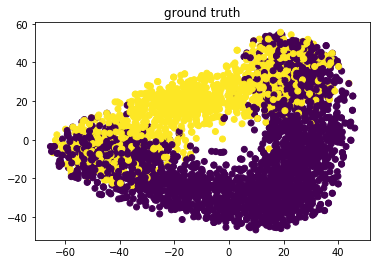

******* KNN *******
auc:  0.5507998577320248
prediction:  0.6415282392026578
******* ABOD *******
auc:  0.5268975390837304
prediction:  0.6355481727574751
******* PCA *******
auc:  0.49966680920106143
prediction:  0.6475083056478406


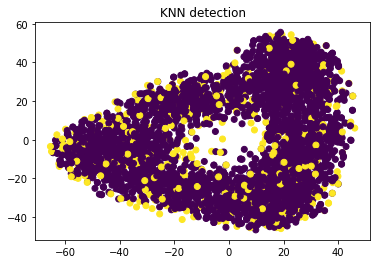

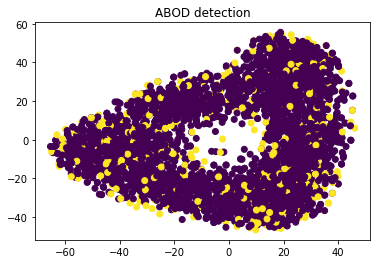

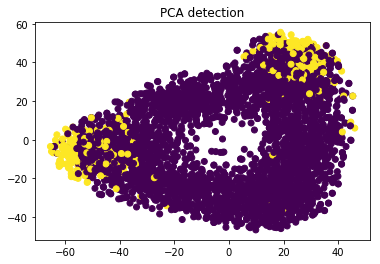

In [6]:
'''
三个模型的检测结果
以AUC和Prediction为评价指标
并可视化
'''
models = {
    'KNN':KNN(),
    'ABOD':ABOD(n_neighbors=10),
    'PCA': PCA()
}

x_tsne = TSNE().fit_transform(x)
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
plt.title('ground truth')
plt.show()

for name, model in models.items():
    model.fit(x)
    y_pred, y_scores = model.labels_, model.decision_scores_
    print('*******', name,'*******')
    print('auc: ', roc_auc_score(y, y_scores))
    print('prediction: ', accuracy_score(y, y_pred))
    
    plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_pred)
    plt.title(name + ' detection')
    plt.show()
    

In [7]:
'''
将上述代码集成为一个函数，将不同的benchmark导入执行
'''

def detection_analysis(pd_file):
    
    ground_truth = pd_file['ground.truth'].values
    ground_truth[ground_truth == 'nominal'] = 0
    ground_truth[ground_truth == 'anomaly'] = 1
    y = ground_truth.astype(int)
    x = data.values[:, 6:].astype(float)
    
    models = {
    'KNN':KNN(),
    'ABOD':ABOD(n_neighbors=10),
    'PCA': PCA()
    }
    x_tsne = TSNE().fit_transform(x)
    plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
    plt.title('ground truth')
    plt.show()
    
    for name, model in models.items():
        model.fit(x)
        y_pred, y_scores = model.labels_, model.decision_scores_
        print('*******', name,'*******')
        print('auc: ', roc_auc_score(y, y_scores))
        print('prediction: ', accuracy_score(y, y_pred))
        
        plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_pred)
        plt.title(name + ' detection')
        plt.show()

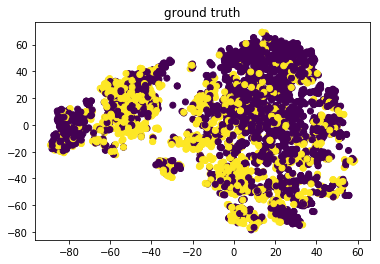

******* KNN *******
auc:  0.5500125623131871
prediction:  0.6367809883877937
******* ABOD *******
auc:  0.5328316213358074
prediction:  0.6302997569538212
******* PCA *******
auc:  0.5418258578604325
prediction:  0.6308398595733189


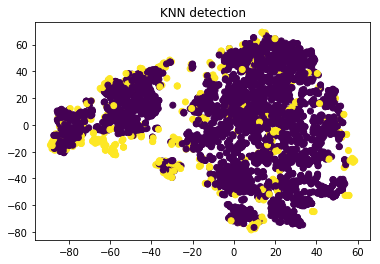

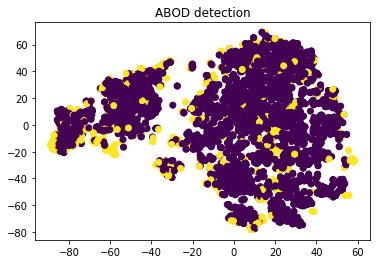

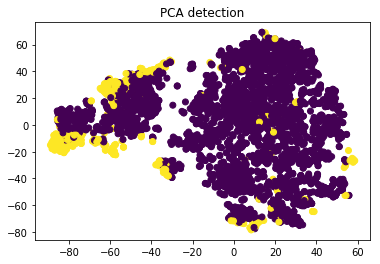

In [9]:
path = 'benchmarks\\'
files = os.listdir(path)
for file in files:
    pd_file = pd.read_csv(path + file)
    detection_analysis(pd_file)
    
